In [34]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split


In [36]:
df = pd.read_csv('multilingual_news_dataset.csv')

In [37]:
df

,text,label
0,Tɔ́n lɛ yí wèmɛ sɔ́.,0
1,Gouvɛ̀nɔ̀mɛ̀ntɔ̀ yì rɔ nɔ̀ xwéxwé tó wɛ gbèdò wɛ.,1
2,Ìyàwó mi rántí ọjọ́ ìbí mi.,0
3,Yàzɔ̀ jì kɔ́n tɔ́n sí Kɔtɔnù yà kpá.,1
4,Les autorités annoncent une baisse du prix du ...,1
...,...,...
1995,Les autorités annoncent une baisse du prix du ...,1
1996,Wá kplɔ́ agbaza!,0
1997,Le gouvernement lance une nouvelle réforme édu...,1
1998,Àjọ tó ń bójú tó àtọ́runwa fi ìwé àfihàn kan j...,1


In [38]:
X = df['text'].values
y = df['label'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 500  # adjust based on dataset
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [40]:
max_len = 500  # or your chosen value
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.build(input_shape=(None, max_len))
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 710,209 (2.71 MB)

 Trainable params: 710,209 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [44]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6337 - loss: 0.6408 - val_accuracy: 1.0000 - val_loss: 0.1234
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 906ms/step - accuracy: 1.0000 - loss: 0.0632 - val_accuracy: 1.0000 - val_loss: 2.7064e-04
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 854ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 9.6551e-05
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 825ms/step - accuracy: 1.0000 - loss: 3.4859e-04 - val_accuracy: 1.0000 - val_loss: 6.5200e-05
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 715ms/step - accuracy: 1.0000 - loss: 2.5216e-04 - val_accuracy: 1.0000 - val_loss: 4.6587e-05


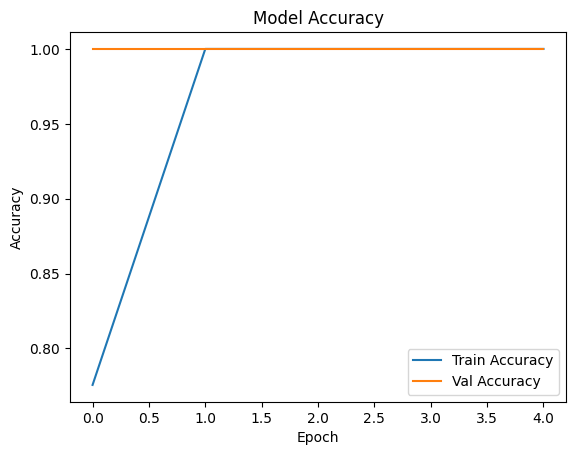

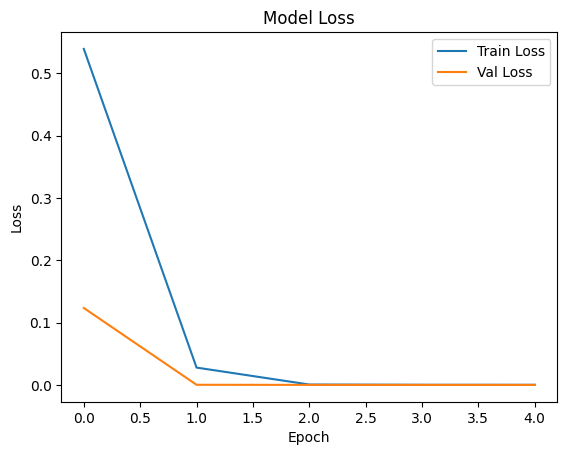

In [45]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
predictions = model.predict(X_test_pad)

# Convert probabilities to binary labels
predicted_labels = (predictions > 0.5).astype("int32")


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step


In [52]:
model.save("fake_news_bilstm_model.h5")

In [48]:
import pickle

# Save the tokenizer to a file
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
